# Introduction to Regression with Neural Network in TensorFlow

There are many definitions for a regression problem but in our case we are going to simplyfy it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number

In [1]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

# tf.config.set_visible_devices('GPU')
tf.config.list_physical_devices()

2.11.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf.config.set_visible_devices([],'GPU')

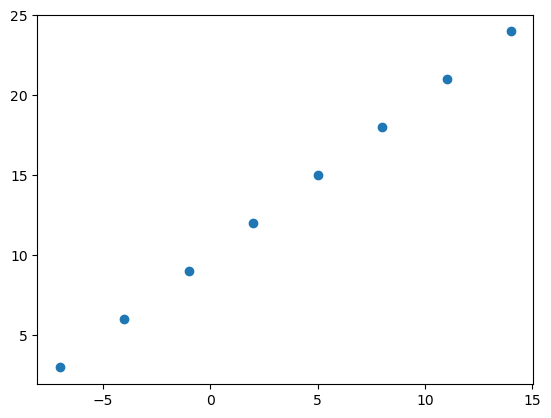

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# create futures
X = np.array([-7.0, -4.0, -1.0, 2.0,5.0,8.0,11.0,14.0])
y = np.array([3,6,9,12,15,18,21,24.0])

plt.scatter(X,y)

In [4]:
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [5]:
input_shape =X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

### steps in Modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a mdel - letting the model try to find patterns between X & y (features and labels).

In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae')

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5


2023-05-22 13:47:41.748840: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 288ms/step - loss: 9.6638
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 9.6496
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 9.6393
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 9.6306
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 9.6229


2023-05-22 13:47:41.951029: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x2818bbb10 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-05-22 13:47:41.951042: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-05-22 13:47:41.966126: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-22 13:47:42.059896: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [8]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 37ms/step


array([[18.824547]], dtype=float32)

In [10]:
y_pred+11

array([[29.824547]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number oh hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or peerhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Lets re-build our model
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['mae'])

# 3. Fit the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 240ms/step - loss: 15.5997 - mae: 15.5997
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 14.7287 - mae: 14.7287
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 14.0880 - mae: 14.0880
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.4604 - mae: 13.4604
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 12.8410 - mae: 12.8410
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 12.2270 - mae: 12.2270
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6158 - mae: 11.6158
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0052 - mae: 11.0052
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3926 - mae: 10.3926
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7752 - mae: 9.7752
Epoch 11/100
1/1 [==============================] - 0s 3ms/

In [12]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 32ms/step


array([[27.893055]], dtype=float32)

### Evalutaing a model

In practice a typical workflow you will go theough when building neural networks
> `Build a model -> fit it -> evaluate it -> tweak a model -> fit it ->  evaluate it...`

when it comes to evaluaition... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize,"

its good idea to visualize:

 * The data - what data are we working with? What does it look like?
 * The model it self - what does our model look like?
 * The training of model - how does model perform while it learns?
 * The prediction of the model - how do the predictions of model line up against the ground truth (original labels)?

In [13]:
#  make a bigger data
X = tf.range(-100, 100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [14]:
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

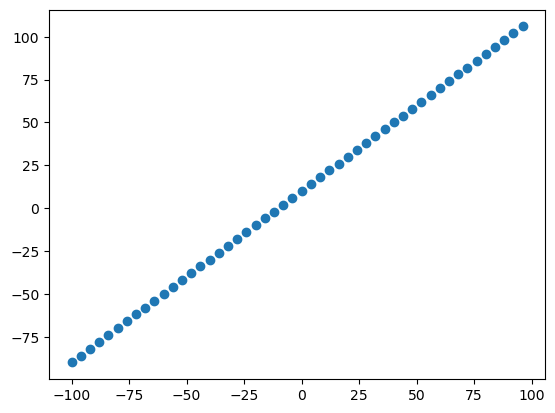

In [15]:
# visualize data
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [16]:
X_train=X[:40] 
X_test=X[40:]

y_train=y[:40]
y_test=y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)



(40, 10, 40, 10)

## Visualizing the data
Now we have got our data in training and test sets.. let's visualize it again

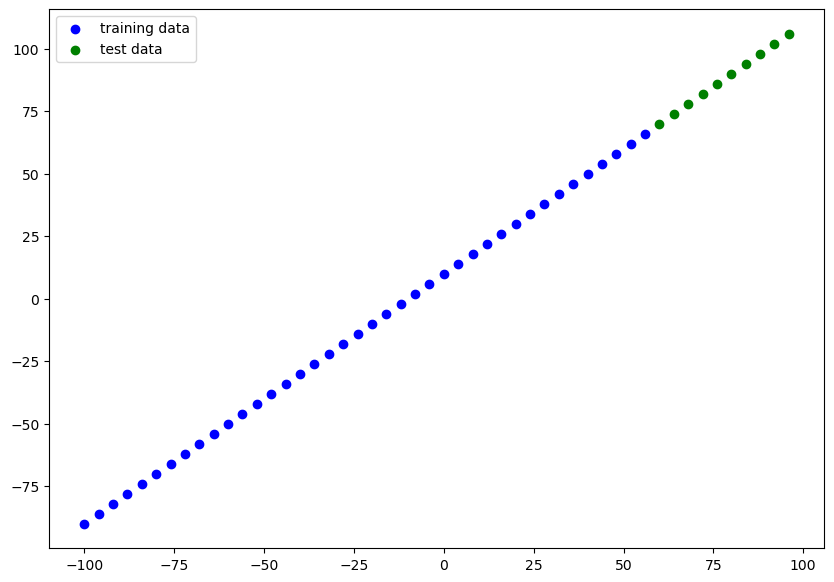

In [17]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="training data")
plt.scatter(X_test, y_test, c='g', label="test data")
plt.legend();

In [18]:
# lets build a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss="mae", optimizer='adam', metrics=['mae'])

# model.fit((tf.expand_dims(X_train, axis=-1)), y_train, epochs=100)

Visualizing Model

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit((tf.expand_dims(X_train, axis=-1)), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 14.2464 - mae: 14.2464
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 14.1920 - mae: 14.1920
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 14.1453 - mae: 14.1453
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 14.0944 - mae: 14.0944
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 14.0466 - mae: 14.0466
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 13.9956 - mae: 13.9956
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 13.9446 - mae: 13.9446
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 13.8935 - mae: 13.8935
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 13.8578 - mae: 13.8578
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 13.8151 - mae: 13.8151
Epoch 11/100
2/2 [==============================] - 0s 1ms/

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Visualizing model prediction
To visualize predictions its a good idea to plot them against the ground truth labels.


In [24]:
# make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 24ms/step


array([[61.05255 ],
       [65.10928 ],
       [69.166016],
       [73.22275 ],
       [77.27947 ],
       [81.336205],
       [85.39294 ],
       [89.44967 ],
       [93.5064  ],
       [97.56313 ]], dtype=float32)

In [25]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [28]:
def plot_prefictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    """
    Plots traing data, test data and compares predictions to ground truth albels
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label="Training data")
    plt.scatter(test_data, test_labels, c='g', label="Test data")
    plt.scatter(test_data, predictions, c='r', label="Prediction")
    plt.legend()
    plt.show();

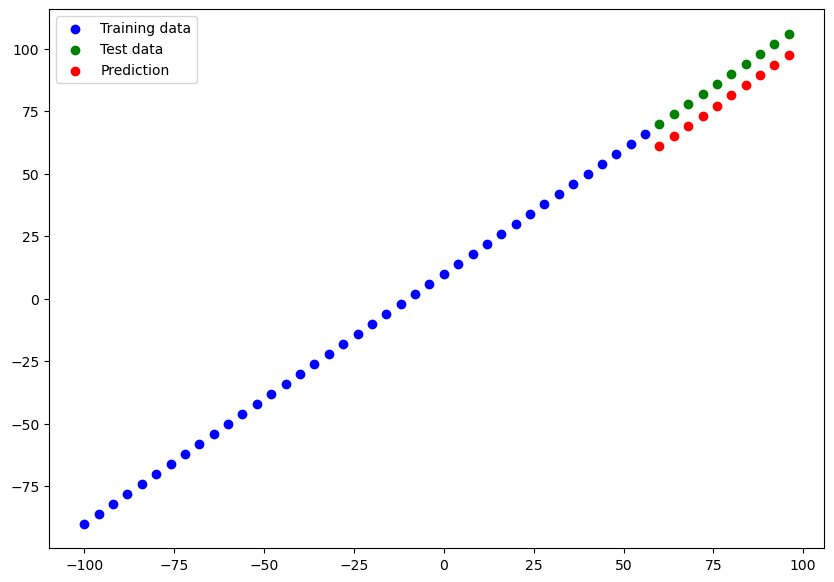

In [29]:
plot_prefictions()

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics

In [41]:
model_1 = Sequential()

model_1.add(Dense(1))

In [42]:
model_1.compile(loss='mae', optimizer='adam', metrics='mae')

In [43]:
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train)

2/2 [==============================] - 0s 2ms/step - loss: 12.2310 - mae: 12.2310


In [44]:
# plot_prefictions(predictions=model_1)
y_pred_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 21ms/step


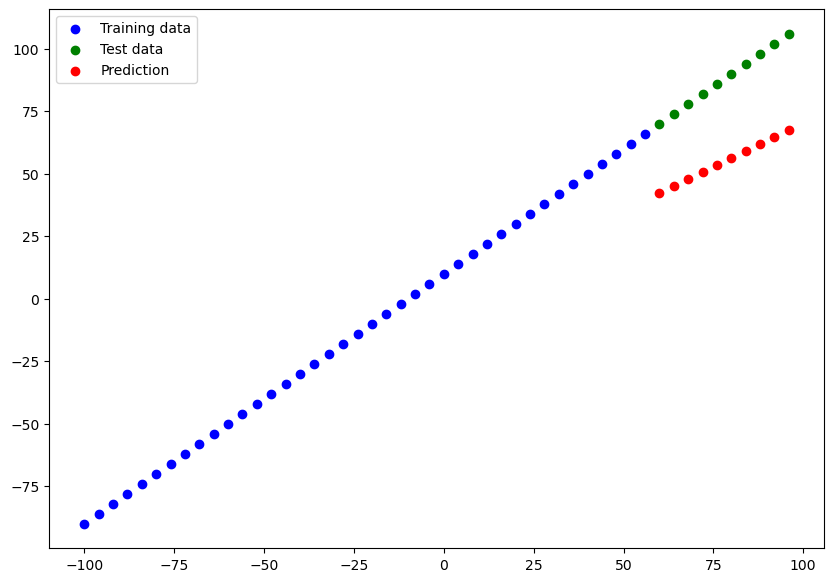

In [45]:
plot_prefictions(predictions=y_pred_1)

In [72]:
model_2 = Sequential()

In [73]:


model_2.add(Dense(10, activation='relu'))
model_2.add(Dense(1,activation='linear'))

model_2.compile(loss='mae', optimizer='sgd', metrics='mse')

# model_2.summary()


In [74]:
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 43.8462 - mse: 2784.7261
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 19.5776 - mse: 551.5117
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 15.9332 - mse: 294.4742
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 7.2055 - mse: 80.2486
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 9.3004 - mse: 127.4965
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.8007 - mse: 128.8840
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 10.0327 - mse: 172.4886
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 12.7044 - mse: 250.3418
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 23.6928 - mse: 989.0021
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 11.1048 - mse: 184.4819
Epoch 11/100
2/2 [==============================] - 

In [75]:
y_pred_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 25ms/step


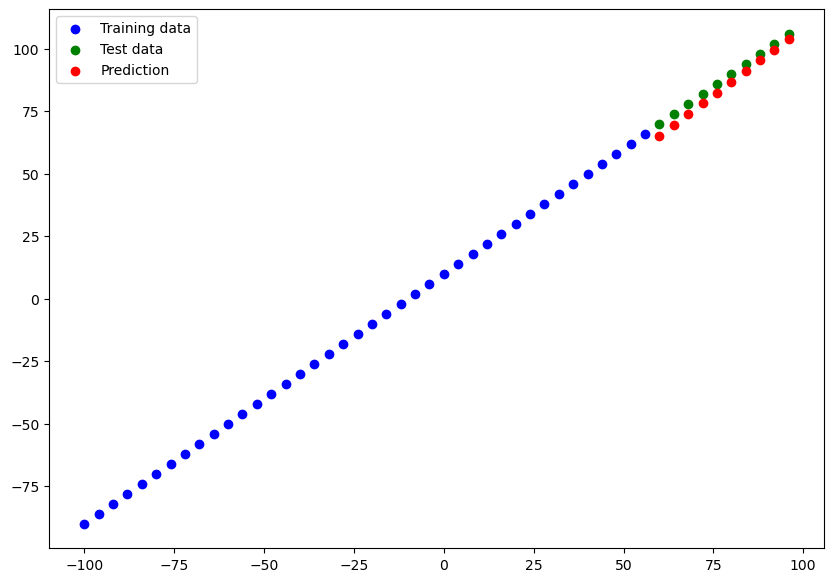

In [76]:
plot_prefictions(predictions=y_pred_2)

In [78]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [79]:
ohe = pd.get_dummies(df)
ohe.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [80]:
# split data into x and y
X = ohe.drop(columns='charges')
y = ohe['charges']

In [81]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [82]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [87]:
model_3 = Sequential()

model_3.add(Dense(10, activation='relu'))
model_3.add(Dense(1, activation='linear'))

model_3.compile(loss='mae', optimizer='adam', metrics='mse')

In [88]:
model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 404us/step - loss: 13264.9717 - mse: 321042752.0000
Epoch 2/100
32/32 [==============================] - 0s 463us/step - loss: 13260.2529 - mse: 320912800.0000
Epoch 3/100
32/32 [==============================] - 0s 489us/step - loss: 13254.5693 - mse: 320758048.0000
Epoch 4/100
32/32 [==============================] - 0s 453us/step - loss: 13247.0664 - mse: 320548256.0000
Epoch 5/100
32/32 [==============================] - 0s 432us/step - loss: 13238.2881 - mse: 320298016.0000
Epoch 6/100
32/32 [==============================] - 0s 439us/step - loss: 13228.8428 - mse: 320036832.0000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 13218.6318 - mse: 319747136.0000
Epoch 8/100
32/32 [==============================] - 0s 561us/step - loss: 13207.5967 - mse: 319438880.0000
Epoch 9/100
32/32 [==============================] - 0s 449us/step - loss: 13195.6484 - mse: 319104960.0000
Epoch 10/100
32/32 [==========

In [89]:
model_3.evaluate(X_test, y_test)

11/11 [==============================] - 0s 464us/step - loss: 8615.0371 - mse: 204180464.0000


[8615.037109375, 204180464.0]

In [90]:
y_train.mean(), y_train.median()

(13267.935817337988, 9447.3824)

In [91]:
shape_input = X_train.shape[1]
shape_input

11

In [97]:
model_4 = Sequential()

model_4.add(Dense(11, input_dim=11, activation = 'relu'))
model_4.add(Dense(5, activation = 'relu'))

In [100]:
model_4.add(Dense(1, activation='linear'))
model_4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 11)                132       
                                                                 
 dense_35 (Dense)            (None, 5)                 60        
                                                                 
 dense_36 (Dense)            (None, 1)                 6         
                                                                 
Total params: 198
Trainable params: 198
Non-trainable params: 0
_________________________________________________________________


In [104]:
model_4.compile(loss='mae', optimizer='adam', metrics='mae')

In [105]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [110]:
history = model_4.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                        epochs=100,
                        )

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 7275.0508 - mae: 7275.0508 - val_loss: 7429.5356 - val_mae: 7429.5356
Epoch 2/100
32/32 [==============================] - 0s 878us/step - loss: 7271.0923 - mae: 7271.0923 - val_loss: 7425.2778 - val_mae: 7425.2778
Epoch 3/100
32/32 [==============================] - 0s 872us/step - loss: 7267.1567 - mae: 7267.1567 - val_loss: 7420.8979 - val_mae: 7420.8979
Epoch 4/100
32/32 [==============================] - 0s 857us/step - loss: 7263.6694 - mae: 7263.6694 - val_loss: 7416.9067 - val_mae: 7416.9067
Epoch 5/100
32/32 [==============================] - 0s 872us/step - loss: 7259.5059 - mae: 7259.5059 - val_loss: 7412.7715 - val_mae: 7412.7715
Epoch 6/100
32/32 [==============================] - 0s 955us/step - loss: 7255.2192 - mae: 7255.2192 - val_loss: 7407.8447 - val_mae: 7407.8447
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 7251.3071 - mae: 7251.3071 - val_loss: 7403.8657 - val_mae:

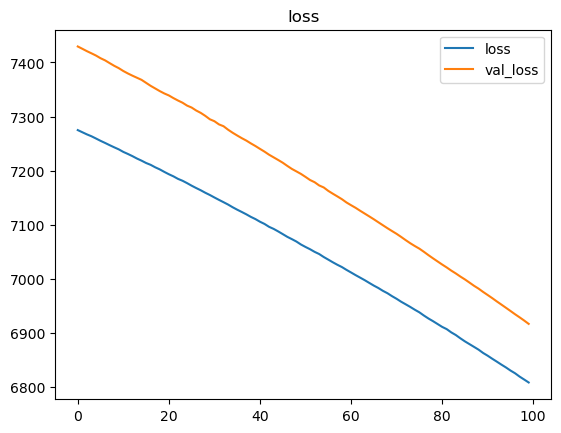

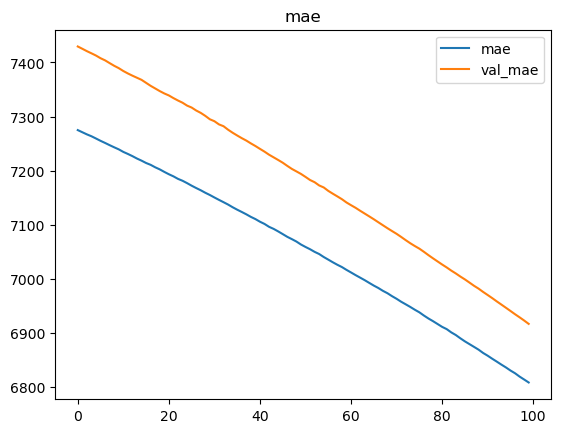

In [111]:
plot_history(history)

In [135]:
model_5 = Sequential()

model_5.add(Dense(100, input_dim=11, activation = 'relu'))
model_5.add(Dense(10, activation = 'relu'))


model_5.add(Dense(1, activation='linear'))
model_5.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 100)               1200      
                                                                 
 dense_61 (Dense)            (None, 10)                1010      
                                                                 
 dense_62 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [136]:
model_5.compile(loss='mae', optimizer='adam', metrics='mae')

In [137]:
history2 = model_5.fit(X_train, y_train,
                      validation_data = (X_test, y_test),
                        epochs=200,
                        )

Epoch 1/200
32/32 [==============================] - 0s 3ms/step - loss: 13262.2246 - mae: 13262.2246 - val_loss: 13264.5029 - val_mae: 13264.5029
Epoch 2/200
32/32 [==============================] - 0s 890us/step - loss: 13242.9365 - mae: 13242.9365 - val_loss: 13234.3447 - val_mae: 13234.3447
Epoch 3/200
32/32 [==============================] - 0s 886us/step - loss: 13194.0938 - mae: 13194.0938 - val_loss: 13157.6123 - val_mae: 13157.6123
Epoch 4/200
32/32 [==============================] - 0s 845us/step - loss: 13080.2207 - mae: 13080.2207 - val_loss: 12993.0898 - val_mae: 12993.0898
Epoch 5/200
32/32 [==============================] - 0s 895us/step - loss: 12857.8008 - mae: 12857.8008 - val_loss: 12696.1670 - val_mae: 12696.1670
Epoch 6/200
32/32 [==============================] - 0s 872us/step - loss: 12482.3740 - mae: 12482.3740 - val_loss: 12219.7217 - val_mae: 12219.7217
Epoch 7/200
32/32 [==============================] - 0s 843us/step - loss: 11907.5049 - mae: 11907.5049 - va

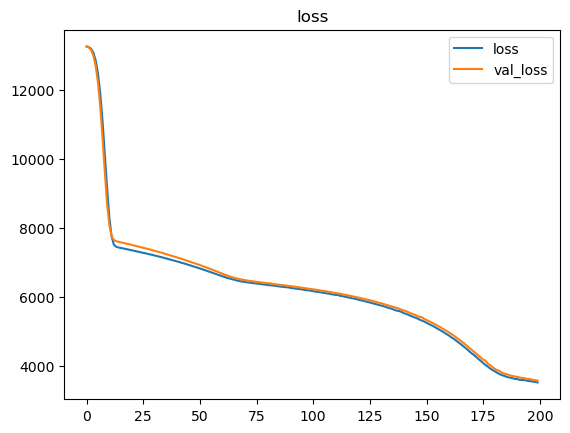

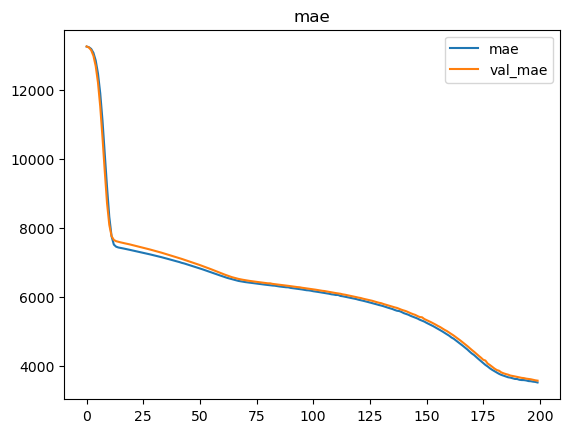

In [138]:
plot_history(history2)

In [139]:
model_5.evaluate(X_test, y_test)

11/11 [==============================] - 0s 454us/step - loss: 3578.8657 - mae: 3578.8657


[3578.86572265625, 3578.86572265625]

In [140]:
model_4.evaluate(X_test, y_test)

11/11 [==============================] - 0s 818us/step - loss: 6917.0420 - mae: 6917.0420


[6917.0419921875, 6917.0419921875]

In [143]:
df2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [144]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [145]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

X = df2.drop(columns='charges')
y = df2['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [146]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [152]:
X_train_normal.shape,X_train.shape 

((1070, 11), (1070, 6))

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [153]:
history3 = model_5.fit(X_train_normal, y_train,
                      validation_data = (X_test_normal, y_test),
                        epochs=200,
                        )

Epoch 1/200
34/34 [==============================] - 0s 3ms/step - loss: 11771.4580 - mae: 11771.4580 - val_loss: 11369.4492 - val_mae: 11369.4492
Epoch 2/200
34/34 [==============================] - 0s 920us/step - loss: 11612.2148 - mae: 11612.2148 - val_loss: 11171.7021 - val_mae: 11171.7021
Epoch 3/200
34/34 [==============================] - 0s 870us/step - loss: 11390.6426 - mae: 11390.6426 - val_loss: 10826.2451 - val_mae: 10826.2451
Epoch 4/200
34/34 [==============================] - 0s 868us/step - loss: 10790.5215 - mae: 10790.5215 - val_loss: 10052.7363 - val_mae: 10052.7363
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 9982.5361 - mae: 9982.5361 - val_loss: 9220.7129 - val_mae: 9220.7129
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9143.9385 - mae: 9143.9385 - val_loss: 8408.7705 - val_mae: 8408.7705
Epoch 7/200
34/34 [==============================] - 0s 848us/step - loss: 8358.8574 - mae: 8358.8574 - val_loss: 7683.8

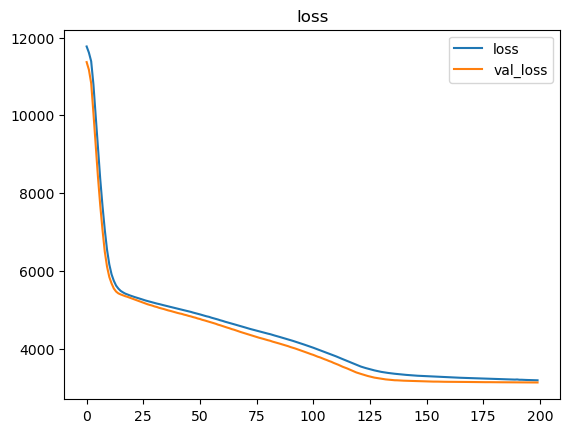

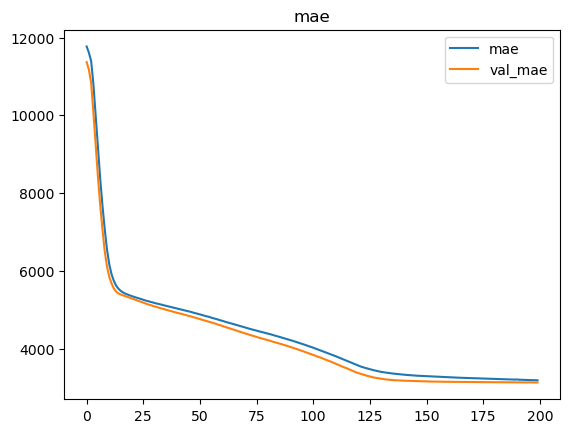

In [154]:
plot_history(history3)

In [155]:
model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 585us/step - loss: 3127.3020 - mae: 3127.3020


[3127.302001953125, 3127.302001953125]

In [159]:
from sklearn.metrics import r2_score
y_pred_5 = model_5.predict(X_test_normal)

9/9 [==============================] - 0s 553us/step


In [160]:
scores = r2_score(y_test, y_pred_5)
scores

0.7440318358592388